In [ ]:
pip install --user --upgrade numpy

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv(r"C:\Users\User\Downloads\dataset\fashion-mnist_train.csv")
test = pd.read_csv(r"C:\Users\User\Downloads\dataset\fashion-mnist_test.csv")

In [9]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Division of data and:

In [10]:
x = train.drop(labels = ['label'], axis=1)
y = train.label
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=2)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(45000, 784) (15000, 784)
(45000,) (15000,)


# PCA (cumsum)

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [12]:
print (X_train.shape, X_test.shape) 

(45000, 84) (15000, 84)


## KNN:

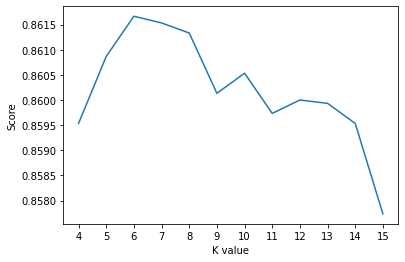

the maximum KNN score is: 86.16666666666667% while k=6


In [24]:
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(4,16):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(4,16), arr)
plt.xticks(np.arange(4,16,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=6")

## Decision Tree:

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predict)*100
print ("Decision Tree accuracy: " + str(clf_accuracy) + "%")

Decision Tree accuracy: 76.36%


## Random Forest:

In [14]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=10)
ran.fit(X_train, y_train)
ran_predict = ran.predict(X_test)
ran_accuracy = accuracy_score(y_test, ran_predict)*100
print ("random forest accuracy: " + str(ran_accuracy) + "%")

random forest accuracy: 82.67999999999999%


## AdaBoost:

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_predict = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predict)*100
print ("AdaBoost accuracy: " + str(ada_accuracy) + "%")

AdaBoost accuracy: 57.013333333333335%


## XGBoost:

In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict)*100
print ("XGBoost accuracy: " + str(xgb_accuracy) + "%")

XGBoost accuracy: 87.92666666666666%


## Pipeline:

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict = pip.predict(X_test)
pip_accuracy = accuracy_score(y_test, pip_predict)*100
print ("Pipeline accuracy: " + str(pip_accuracy) + "%")

Pipeline accuracy: 89.56%


## Stacking:

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
sta.fit(X_train, y_train)
sta_predict = sta.predict(X_test)
sta_accuracy = accuracy_score(y_test, sta_predict)*100
print ("Stacking accuracy: " + str(sta_accuracy) + "%")

Stacking accuracy: 85.70666666666666%


## Voting:

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vot.fit(X_train, y_train)
vot_predict = vot.predict(X_test)
vot_accuracy = accuracy_score(y_test, vot_predict)*100
print ("Voting accuracy: " + str(vot_accuracy) + "%")

Voting accuracy: 85.40666666666667%


## KMeans:

In [23]:
from sklearn.cluster import KMeans
kme = KMeans(n_clusters=10)
kme.fit(X_train, y_train)
kme_predict = kme.predict(X_test)
kme_accuracy = accuracy_score(y_test, kme_predict)*100
print ("KMeans accuracy: " + str(kme_accuracy) + "%")

KMeans accuracy: 10.933333333333334%


# Comparison between the models after PCA 138:

In [ ]:
arrX = ['KMeans','Decision Tree', 'Stacking', 'KNN', 'AdaBoost', 'Voting', 'XGBoost', 'Random Forest', 'Pipeline']
arrY = [kme_accuracy, clf_accuracy, sta_accuracy, knn_accuracy, ada_accuracy, vot_accuracy, xgb_accuracy, ran_accuracy, pip_accuracy]
plt.plot (arrX, arrY, 'r--')
plt.title('accuracy score')
plt.yticks(np.arange(10,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

# confusion_matrix after PCA 84:

In [ ]:
from sklearn import metrics
pip_confusion = metrics.confusion_matrix(y_test, pip_predict)
ran_confusion = metrics.confusion_matrix(y_test, ran_predict)
vot_confusion = metrics.confusion_matrix(y_test, vot_predict)
xgb_confusion = metrics.confusion_matrix(y_test, xgb_predict)

In [ ]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Pipline Confusion Matrix",fontsize=18)
sns.heatmap(pip_confusion,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.show()